In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Lecture des données


In [36]:
data1 = pd.read_csv('./steam.csv')
data1 = data1[:2000]
data1.shape

(2000, 5)

In [37]:
data1.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


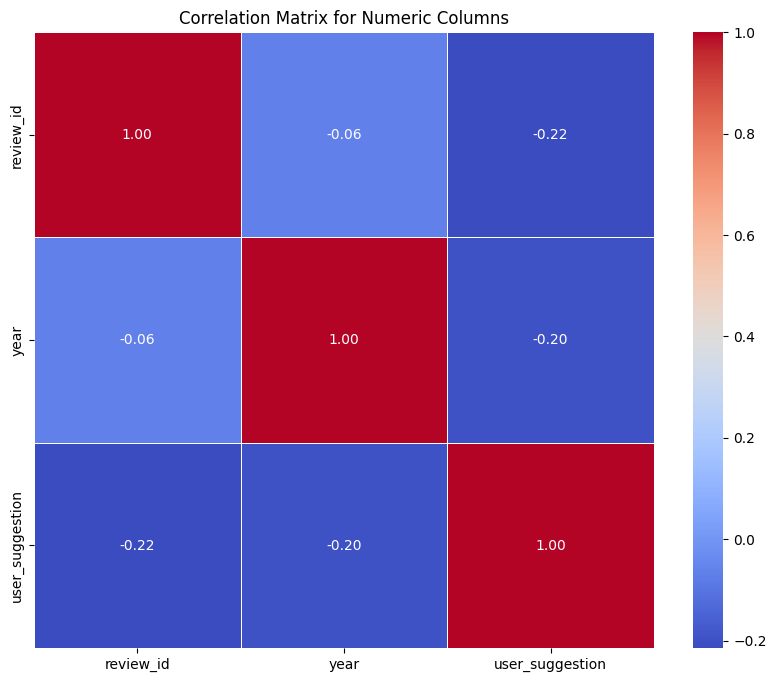

In [38]:
corr = data1[data1.select_dtypes(include=['int64', 'float64']).columns.tolist()].corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

## Analyse des données

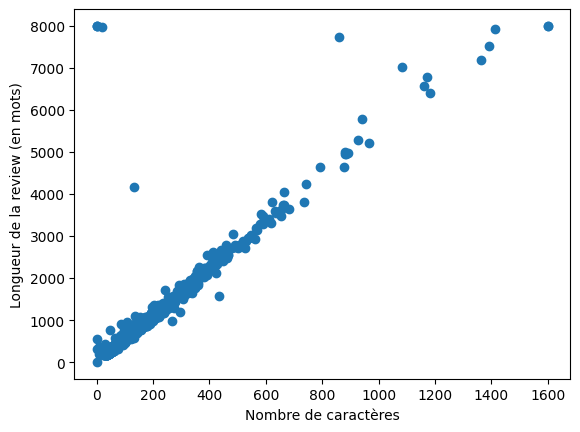

In [39]:
# Analyser le nombre de mots par ligne
data1["words_count"] = data1["user_review"].str.split().str.len()

# Analyser la longueur des phrases
data1["user_review_lenght"] = data1["user_review"].str.len()

plt.scatter(data1["words_count"], data1["user_review_lenght"])
plt.xlabel("Nombre de caractères")
plt.ylabel("Longueur de la review (en mots)")
plt.show()

## Nettoyage des données

In [40]:

data1["title"] = data1["title"].str.lower()
data1["user_review"] = data1["user_review"].str.lower()

data1 = data1.dropna(how="all")
data1 = data1.drop_duplicates()

data1

,review_id,title,year,user_review,user_suggestion,words_count,user_review_length
0,1,spooky's jump scare mansion,2016.0,i'm scared and hearing creepy voices. so i'll...,1,132,710
1,2,spooky's jump scare mansion,2016.0,"best game, more better than sam pepper's youtu...",1,44,335
2,3,spooky's jump scare mansion,2016.0,"a littly iffy on the controls, but once you kn...",1,70,397
3,4,spooky's jump scare mansion,2015.0,"great game, fun and colorful and all that.a si...",1,47,280
4,5,spooky's jump scare mansion,2015.0,not many games have the cute tag right next to...,1,67,334
...,...,...,...,...,...,...,...
1995,2459,dota 2,2014.0,best moba i've ever come across and trust me o...,1,58,274
1996,2460,dota 2,2014.0,i have been using several russian language sim...,1,71,397
1997,2461,dota 2,2015.0,be aware that the community in this game is ma...,0,37,192
1998,2462,dota 2,2018.0,let me tell u guys the truth of dotaim one of ...,0,331,1743


### Suppression des lignes ou les commentaires sont trop court ou trop long
On a fixé une limite de caractères comprises entre 100 et 500  

In [41]:
data1 = data1.query("user_review_lenght >= 100 and user_review_length <= 500")
data1

,review_id,title,year,user_review,user_suggestion,words_count,user_review_length
1,2,spooky's jump scare mansion,2016.0,"best game, more better than sam pepper's youtu...",1,44,335
2,3,spooky's jump scare mansion,2016.0,"a littly iffy on the controls, but once you kn...",1,70,397
3,4,spooky's jump scare mansion,2015.0,"great game, fun and colorful and all that.a si...",1,47,280
4,5,spooky's jump scare mansion,2015.0,not many games have the cute tag right next to...,1,67,334
5,6,spooky's jump scare mansion,2015.0,"early access reviewit's pretty cute at first, ...",1,32,209
...,...,...,...,...,...,...,...
1992,2456,dota 2,2013.0,judging by the fact that i managed to play 14 ...,0,41,201
1995,2459,dota 2,2014.0,best moba i've ever come across and trust me o...,1,58,274
1996,2460,dota 2,2014.0,i have been using several russian language sim...,1,71,397
1997,2461,dota 2,2015.0,be aware that the community in this game is ma...,0,37,192
